Dataset: [Kaggle Laptop Prices Dataset](https://www.kaggle.com/datasets/owm4096/laptop-prices)

# Laptop Price Prediction Project
**Author:** Ghziith

## Project Overview
In today’s world, laptops are essential tools for both personal and professional activities. This project aims to predict laptop prices using machine learning techniques. The model will help manufacturers, retailers, and consumers make informed decisions about laptop pricing based on various specifications and features.

### Project Structure:
1. Data Loading and Initial Exploration
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Development
6. Model Evaluation
7. Conclusion and Recommendations

### Success Metrics:
- R-squared (R²) score
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import math

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
# Fine Tune
import optuna

plt.style.use('fivethirtyeight')
# Set rcParams for global customization
plt.rcParams['axes.facecolor'] = 'white'  # Background inside the axes (default grey)
plt.rcParams['figure.facecolor'] = 'white'  # Entire figure's background
plt.rcParams['grid.color'] = 'lightgrey'  # Gridline color
plt.rcParams['axes.edgecolor'] = 'white'  # Spines color
plt.rcParams['grid.linewidth'] = 0.5     # Gridline width

c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1.1 Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv("laptop_prices.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Display sample data
print("\nSample Data:")
df.head()

Dataset Shape: (1275, 23)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


## 2. Data Preprocessing

In [3]:
# Remove duplicates
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

Dataset shape after removing duplicates: (1275, 23)


In [4]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")


Numerical columns: ['Inches', 'Ram', 'Weight', 'Price_euros', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']
Categorical columns: ['Company', 'Product', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model']


In [5]:
for col in cat_cols:
    print(f"{col} unique values:\n{df[col].unique()}")

Company unique values:
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Product unique values:
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'GS73VR 7RG' 'X541UA-DM1897 (

there are some inconsistencies in naming

In [6]:
df['GPU_model'] = df['GPU_model'].str.strip()

df["GPU_model"] = df["GPU_model"].replace({
    'GeForce 150MX': 'GeForce MX150',
    'GeForce 920':  'GeForce 920M',
    'GeForce 960M': "GeForce GTX 960M",
    'GeForce GT 940MX': "GeForce 940MX",
    'GeForce GTX 930MX': "GeForce 930MX",
    'GeForce GTX 940M': "GeForce 940M",
    'GeForce GTX 940MX': "GeForce 940MX",
    'GeForce GTX 960<U+039C>': "GeForce GTX 960M",
    'GTX 980 SLI': 'GeForce GTX 980',
    'GeForce GTX 1050 Ti': "GeForce GTX 1050Ti",
    'GeForce GTX1050 Ti': "GeForce GTX 1050Ti",
    'GeForce GTX1060': "GeForce GTX 1060",
    'GeForce GTX1080': "GeForce GTX 1080",
    'Quadro M2200M': "Quadro M2200",
    'Quadro M520M': "Quadro M520",
    'Quadro M620M': "Quadro M620",
    'Graphics 620': "HD Graphics 620",
    'R17M-M1-70': "Radeon R5 M430",
    'Radeon R2 Graphics': "Radeon R2",
    'Radeon R4 Graphics': "Radeon R4",
    'R4 Graphics' : "Radeon R4",
    'Radeon R7 Graphics': "Radeon R7"
})

df['CPU_model'] = df['CPU_model'].str.strip()

df['CPU_model'] = df['CPU_model'].replace({
    'A6-Series A6-9220': 'A6-Series 9220',
    'A9-Series A9-9420': 'A9-Series 9420',
    'A10-Series A10-9620P': 'A10-Series 9620P',
    
    'E-Series E2-6110': 'E-Series 6110',
    'E2-6110': 'E-Series 6110',
    'E-Series E2-9000': 'E-Series 9000',
    'E2-9000e': 'E-Series 9000e',
    'E-Series E2-9000e': 'E-Series 9000e',
    
    'Atom Z8350': 'Atom X5-Z8350',
    
    'Core M': 'Unknown Core m',
    'Core M m3': 'Core M3',
    'Core M m3-7Y30': 'Core M M3-7Y30',
    'Core M 6Y30': 'Core M M5-6Y30',
    'Core M 6Y54': 'Core M M5-6Y54',
    'Core M 6Y75': 'Core M M5-6Y75',
    'Core M 7Y30': 'Core M M5-7Y30',
})

## 4. Exploratory Data Analysis (EDA)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

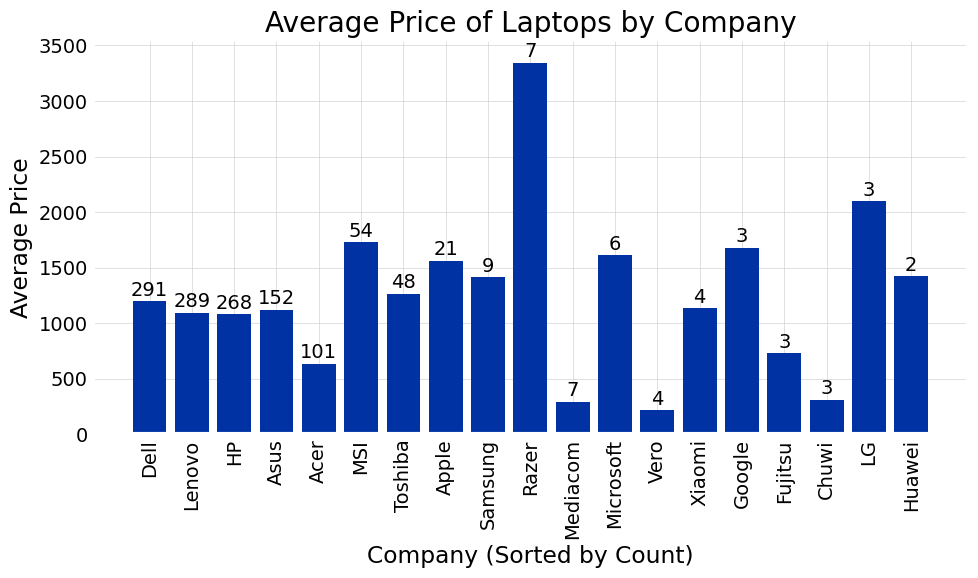

In [8]:
df_grouped = df.groupby('Company')['Price_euros'].mean().reset_index()
df_grouped['Count'] = df['Company'].value_counts().sort_index().values
df_grouped = df_grouped.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Company'], df_grouped['Price_euros'], color='#0032a4')
plt.xlabel("Company (Sorted by Count)")
plt.ylabel("Average Price")
plt.title("Average Price of Laptops by Company")
plt.xticks(rotation=90)
plt.ylim(0, df_grouped['Price_euros'].max() + 200)

for i, (price, count) in enumerate(zip(df_grouped['Price_euros'], df_grouped['Count'])):
    plt.text(i, price + 50, str(count), color='black', ha='center')

plt.tight_layout()
plt.show()

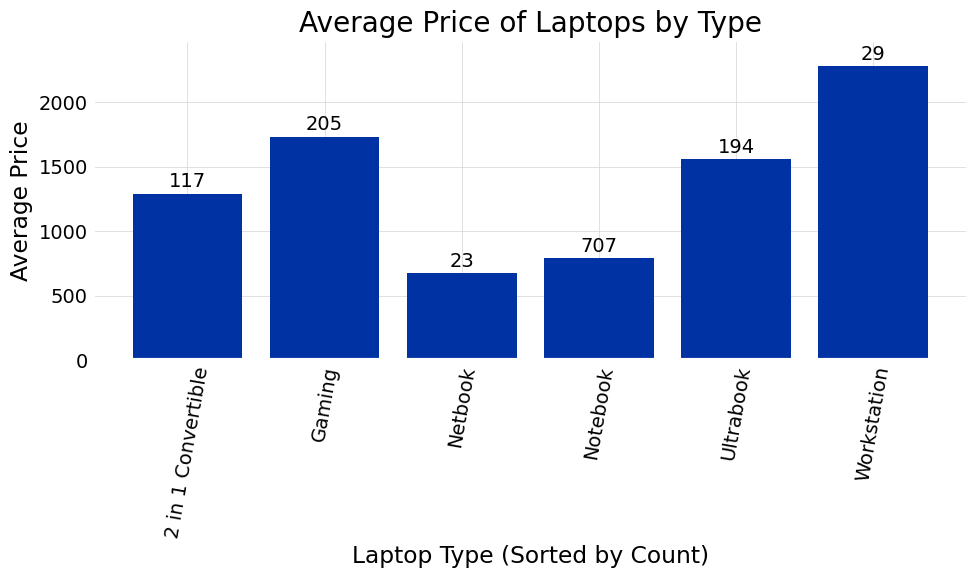

In [9]:
type_grouped = df.groupby('TypeName')['Price_euros'].agg(['mean', 'count']).reset_index()
type_grouped.columns = ['TypeName', 'Price_euros', 'Count']

plt.figure(figsize=(10, 6))
plt.bar(type_grouped['TypeName'], type_grouped['Price_euros'], color='#0032a4')
plt.xlabel("Laptop Type (Sorted by Count)")
plt.ylabel("Average Price")
plt.title("Average Price of Laptops by Type")
plt.xticks(rotation=80)
plt.ylim(0, type_grouped['Price_euros'].max() + 200)
for i, (price, count) in enumerate(zip(type_grouped['Price_euros'], type_grouped['Count'])):
    plt.text(i, price + 50, str(count), color='black', ha='center')

plt.tight_layout()
plt.show()

c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning:

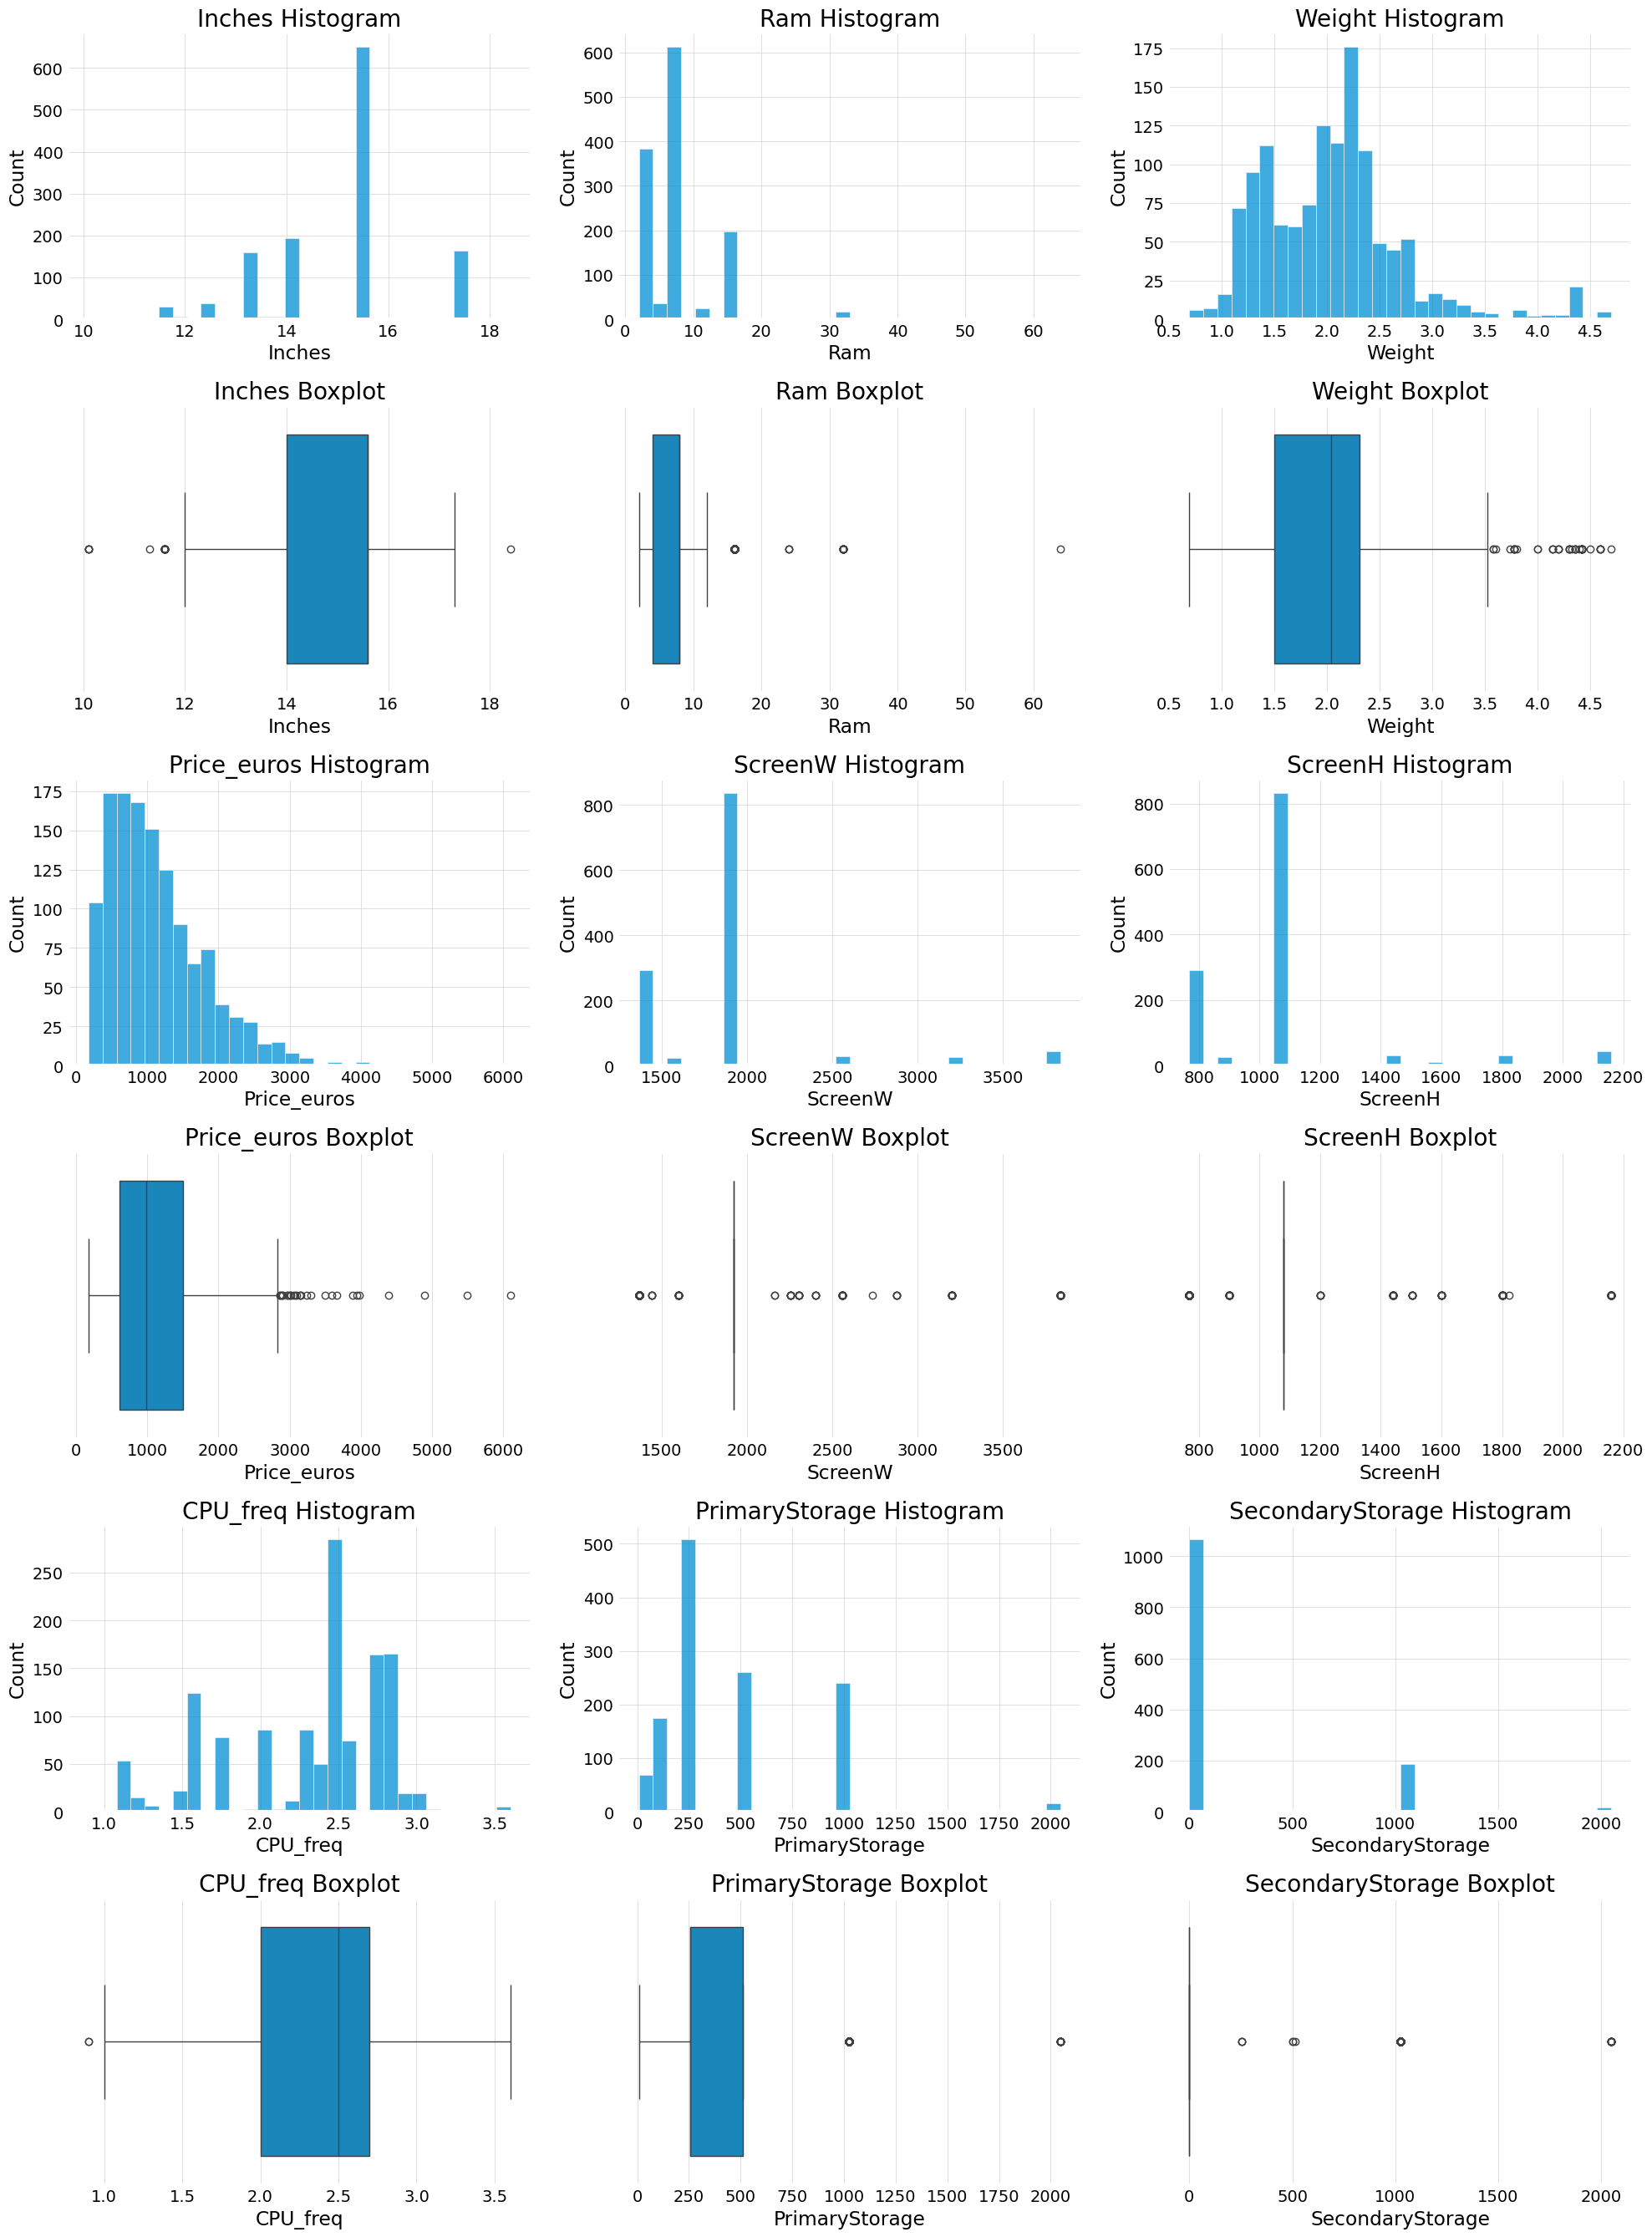

In [10]:
def plot_numerical_distributions(df, num_cols):
    """Plot distribution of numerical features in a horizontal layout"""
    n_cols_per_row = 3  # Number of columns per row (each column contains a hist and boxplot)
    total_plots = len(num_cols)
    n_rows = (total_plots + n_cols_per_row - 1) // n_cols_per_row  # Calculate rows needed
    
    fig, axes = plt.subplots(n_rows * 2, n_cols_per_row, figsize=(20, total_plots * 3))  # Double rows for hist + box
    
    for i, col in enumerate(num_cols):
        row = (i // n_cols_per_row) * 2  # Row index for hist
        col_idx = i % n_cols_per_row     # Column index
        
        # Histogram
        sns.histplot(df[col], bins=30, ax=axes[row, col_idx])
        axes[row, col_idx].set_title(f'{col} Histogram')
        
        # Boxplot
        sns.boxplot(x=df[col], ax=axes[row + 1, col_idx], orient='v')
        axes[row + 1, col_idx].set_title(f'{col} Boxplot')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example Usage
plot_numerical_distributions(df, num_cols)    

In [11]:
# # Log transform skewed numerical features
cols_to_log = ['Ram', 'PrimaryStorage', 'SecondaryStorage']
df[cols_to_log] = np.log1p(df[cols_to_log])

### 4. Feature Engineering

Inspecting any correlation of any feature with the target variable

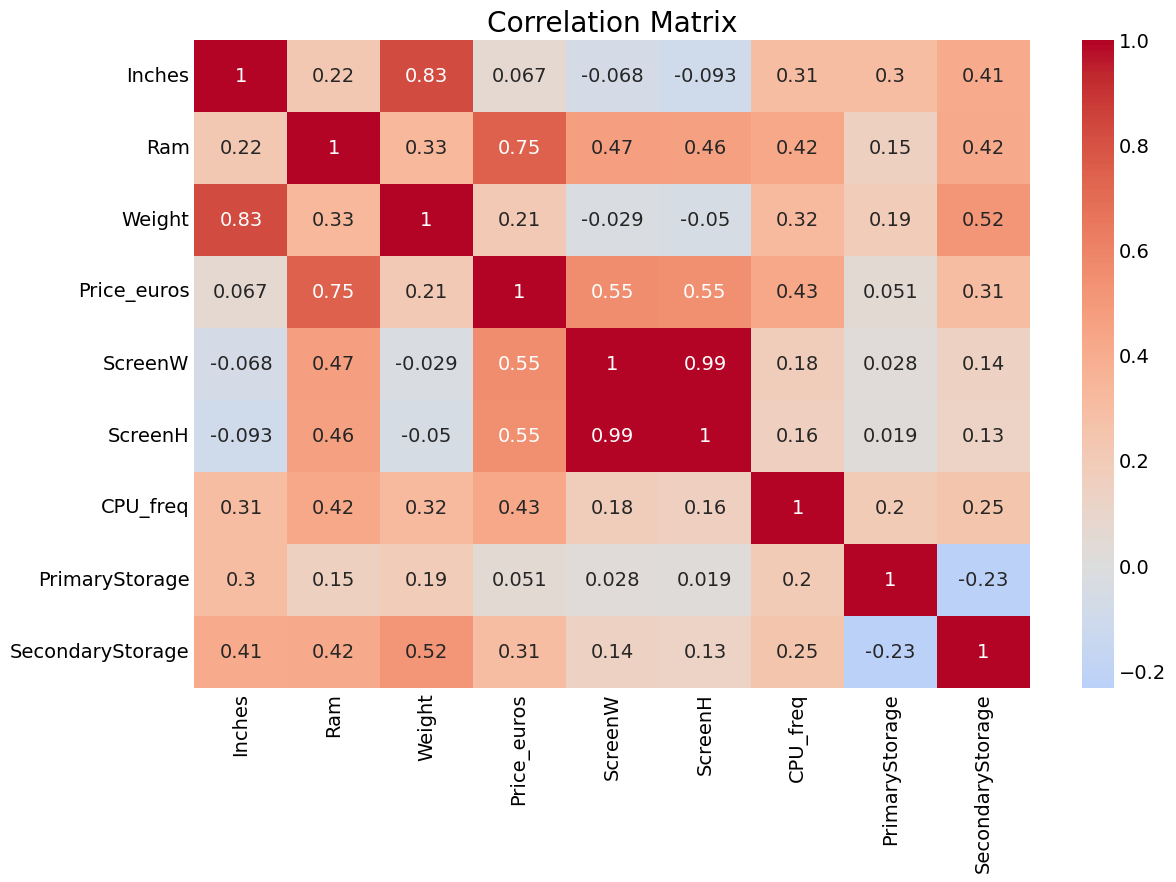

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [13]:
def create_gpu_performance_mapping():
    gpu_performance = {
        # Entry-level GPUs (Score: 1)
        "HD Graphics": 1,
        "HD Graphics 400": 1,
        "HD Graphics 405": 1,
        "HD Graphics 500": 1,
        "HD Graphics 505": 1,
        "HD Graphics 510": 1,
        "HD Graphics 515": 1,
        "HD Graphics 520": 1,
        "HD Graphics 530": 1,
        "HD Graphics 540": 1,
        "HD Graphics 615": 1,
        "HD Graphics 620": 1,
        "HD Graphics 630": 1,
        "HD Graphics 6000": 1,
        "Radeon Pro 455": 1,
        "Iris Pro Graphics": 1,
        "Radeon Pro 555": 1,
        "Radeon Pro 560": 1,
        "Iris Graphics 550": 1,
        "HD Graphics 5300": 1,
        "UHD Graphics 620": 1,
        "Iris Graphics 540": 1,
        "Iris Plus Graphics 640": 1,
        "Iris Plus Graphics 650": 1,
        "Radeon R2": 1,
        "Radeon R3": 1,
        "Radeon R4": 1,
        "Radeon R5": 1,
        "Radeon R5 430": 1,
        "Radeon R5 520": 1,
        "Radeon R5 M315": 1,
        "Radeon R5 M330": 1,
        "Radeon R5 M420": 1,
        "Radeon R5 M420X": 1,
        "Radeon R5 M430": 1,
        "Radeon R7": 1,
        "Radeon R7 M360": 1,
        "Radeon R7 M365X": 1,
        "Radeon R7 M440": 1,
        "Radeon R7 M445": 1,
        "Radeon R7 M460": 1,
        "Radeon R7 M465": 1,
        "Radeon 520": 1,
        "Radeon 530": 1,
        "Radeon 540": 1,
        "GeForce 920M": 1,
        "GeForce 920MX": 1,
        "GeForce 930M": 1,
        "GeForce 930MX": 1,
        "GeForce 940M": 1,
        "GeForce 940MX": 1,
        "GeForce MX130": 1,
        "GeForce MX150": 1,
        "Mali T860 MP4": 1,

        # Mid-range GPUs (Score: 2-4)
        "Radeon RX 540": 2,
        "Radeon RX 550": 2,
        "Radeon RX 560": 3,
        "Radeon R9 M385": 3,
        "GeForce GTX 950M": 3,
        "GeForce GTX 960": 3,
        "GeForce GTX 960M": 3,
        "GeForce GTX 965M": 3,
        "GeForce GTX 1050": 4,
        "GeForce GTX 1050M": 4,
        "GeForce GTX 1050Ti": 4,
        "Quadro M1000M": 3,
        "Quadro M1200": 3,
        "Quadro M2000M": 3,
        "Quadro M2200": 3,
        "Quadro M500M": 3,
        "Quadro M520": 3,
        "Quadro M620": 3,

        # High-performance GPUs (Score: 5-7)
        "Radeon RX 580": 5,
        "FirePro W4190M": 5,
        "FirePro W5130M": 5,
        "FirePro W6150M": 5,
        "GeForce GTX 970M": 6,
        "GeForce GTX 980M": 6,
        "GeForce GTX 980": 6,
        "GeForce GTX 980 SLI": 7,
        "GeForce GTX 1060": 7,
        "GeForce GTX 1070M": 7,
        "GeForce GTX 1070": 7,
        "GeForce GTX 1080": 7,
        "Quadro 3000M": 6,
        "Quadro M3000M": 6
    }
    return gpu_performance

# Apply the mapping to your DataFrame
df['GPU_Performance'] = df['GPU_model'].map(create_gpu_performance_mapping())

#### 3.2.1 Encoding

In [14]:
encoder = LabelEncoder()
for col in df.columns:
	if df[col].dtype=="O":
		df[col]= encoder.fit_transform(df[col])
del(encoder)

In [15]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model,GPU_Performance
0,1,300,4,13.3,2.197225,8,1.37,1339.69,3,2560,...,1,2.3,35,4.859812,0.0,3,2,2,42,1
1,1,301,4,13.3,2.197225,8,1.34,898.94,3,1440,...,1,1.8,35,4.859812,0.0,0,2,2,36,1
2,7,50,3,15.6,2.197225,4,1.86,575.00,1,1920,...,1,2.5,41,5.549076,0.0,3,2,2,38,1
3,1,300,4,15.4,2.833213,8,1.83,2537.45,3,2880,...,1,2.7,49,6.240276,0.0,3,2,0,58,1
4,1,300,4,13.3,2.197225,8,1.37,1803.60,3,2560,...,1,3.1,35,5.549076,0.0,3,2,2,43,1


#### 3.2.2 Features

In [16]:

# Screen-related features
df['Resolution'] = df['ScreenW'] * df['ScreenH']
df['PPI'] = df['Resolution'] / df['Inches']
df['Screen_Quality'] = df['Screen'] * df['Resolution'] 
df['Panel'] = df['Screen'] * df['Inches']
df['Screen_Ratio'] = df['ScreenW'] / df['ScreenH']

# Interaction features
df['IPS_Quality'] = df['Panel'] * df['IPSpanel']
df['Retina_Quality'] = df['Panel'] * df['RetinaDisplay']
df['GPU_Screen_Interaction'] = df['GPU_model'] * df['Screen']

# Portability feature
df['Inch/Weight'] = df['Inches'] / df['Weight']

# Storage-based features
df['Storage_Feature1'] = df['PrimaryStorageType'] * df['PrimaryStorage']
df['Storage_Feature2'] = df['SecondaryStorageType'] * df['SecondaryStorage']
df['Storage_Feature'] = df['Storage_Feature1'] + df['Storage_Feature2']

# GPU and CPU interaction
df['GPU_CPU'] = df['GPU_model'] * df['CPU_freq']

# Computing power and rendering efficiency
df['Computing_Value'] = 0.7 * df['CPU_freq'] + 0.3 * df['Ram']
df['Rendering_Value'] = 0.7 * df['GPU_model'] + 0.3 * df['Ram']

# Overall performance
df['Overall_Performance'] = (
    0.5 * df['GPU_CPU'] +
    0.3 * df['Ram'] +
    0.2 * df['Storage_Feature']
)

# Portability score
df['Portable_Value'] = (
    -1 * df['Weight'] +
    0.4 * df['Screen'] +
    0.3 * df['Touchscreen'] +
    0.2 * df['Overall_Performance'] +
    0.1 * df['RetinaDisplay'] +
    0.1 * df['IPSpanel']
)

# Final overall value
df['Overall_Value'] = (
    0.5 * df['Overall_Performance'] +
    0.3 * df['Portable_Value'] +
    0.2 * df['Company']
)

print("Features after engineering:")
print(df.columns.tolist())

# df[['GPU_Performance','Resolution', 'PPI', 'Screen_Quality', 'Panel', 'Screen_Ratio', 'IPS_Quality', 'Retina_Quality', 'GPU_Screen_Interaction', 'Inch/Weight', 'Storage_Feature1', 'Storage_Feature2', 'Storage_Feature', 'GPU_CPU', 'Computing_Value', 'Rendering_Value', 'Overall_Performance', 'Portable_Value', 'Overall_Value', 'Price_euros']].corr()

Features after engineering:
['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight', 'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType', 'SecondaryStorageType', 'GPU_company', 'GPU_model', 'GPU_Performance', 'Resolution', 'PPI', 'Screen_Quality', 'Panel', 'Screen_Ratio', 'IPS_Quality', 'Retina_Quality', 'GPU_Screen_Interaction', 'Inch/Weight', 'Storage_Feature1', 'Storage_Feature2', 'Storage_Feature', 'GPU_CPU', 'Computing_Value', 'Rendering_Value', 'Overall_Performance', 'Portable_Value', 'Overall_Value']


c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\Ghazi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning:

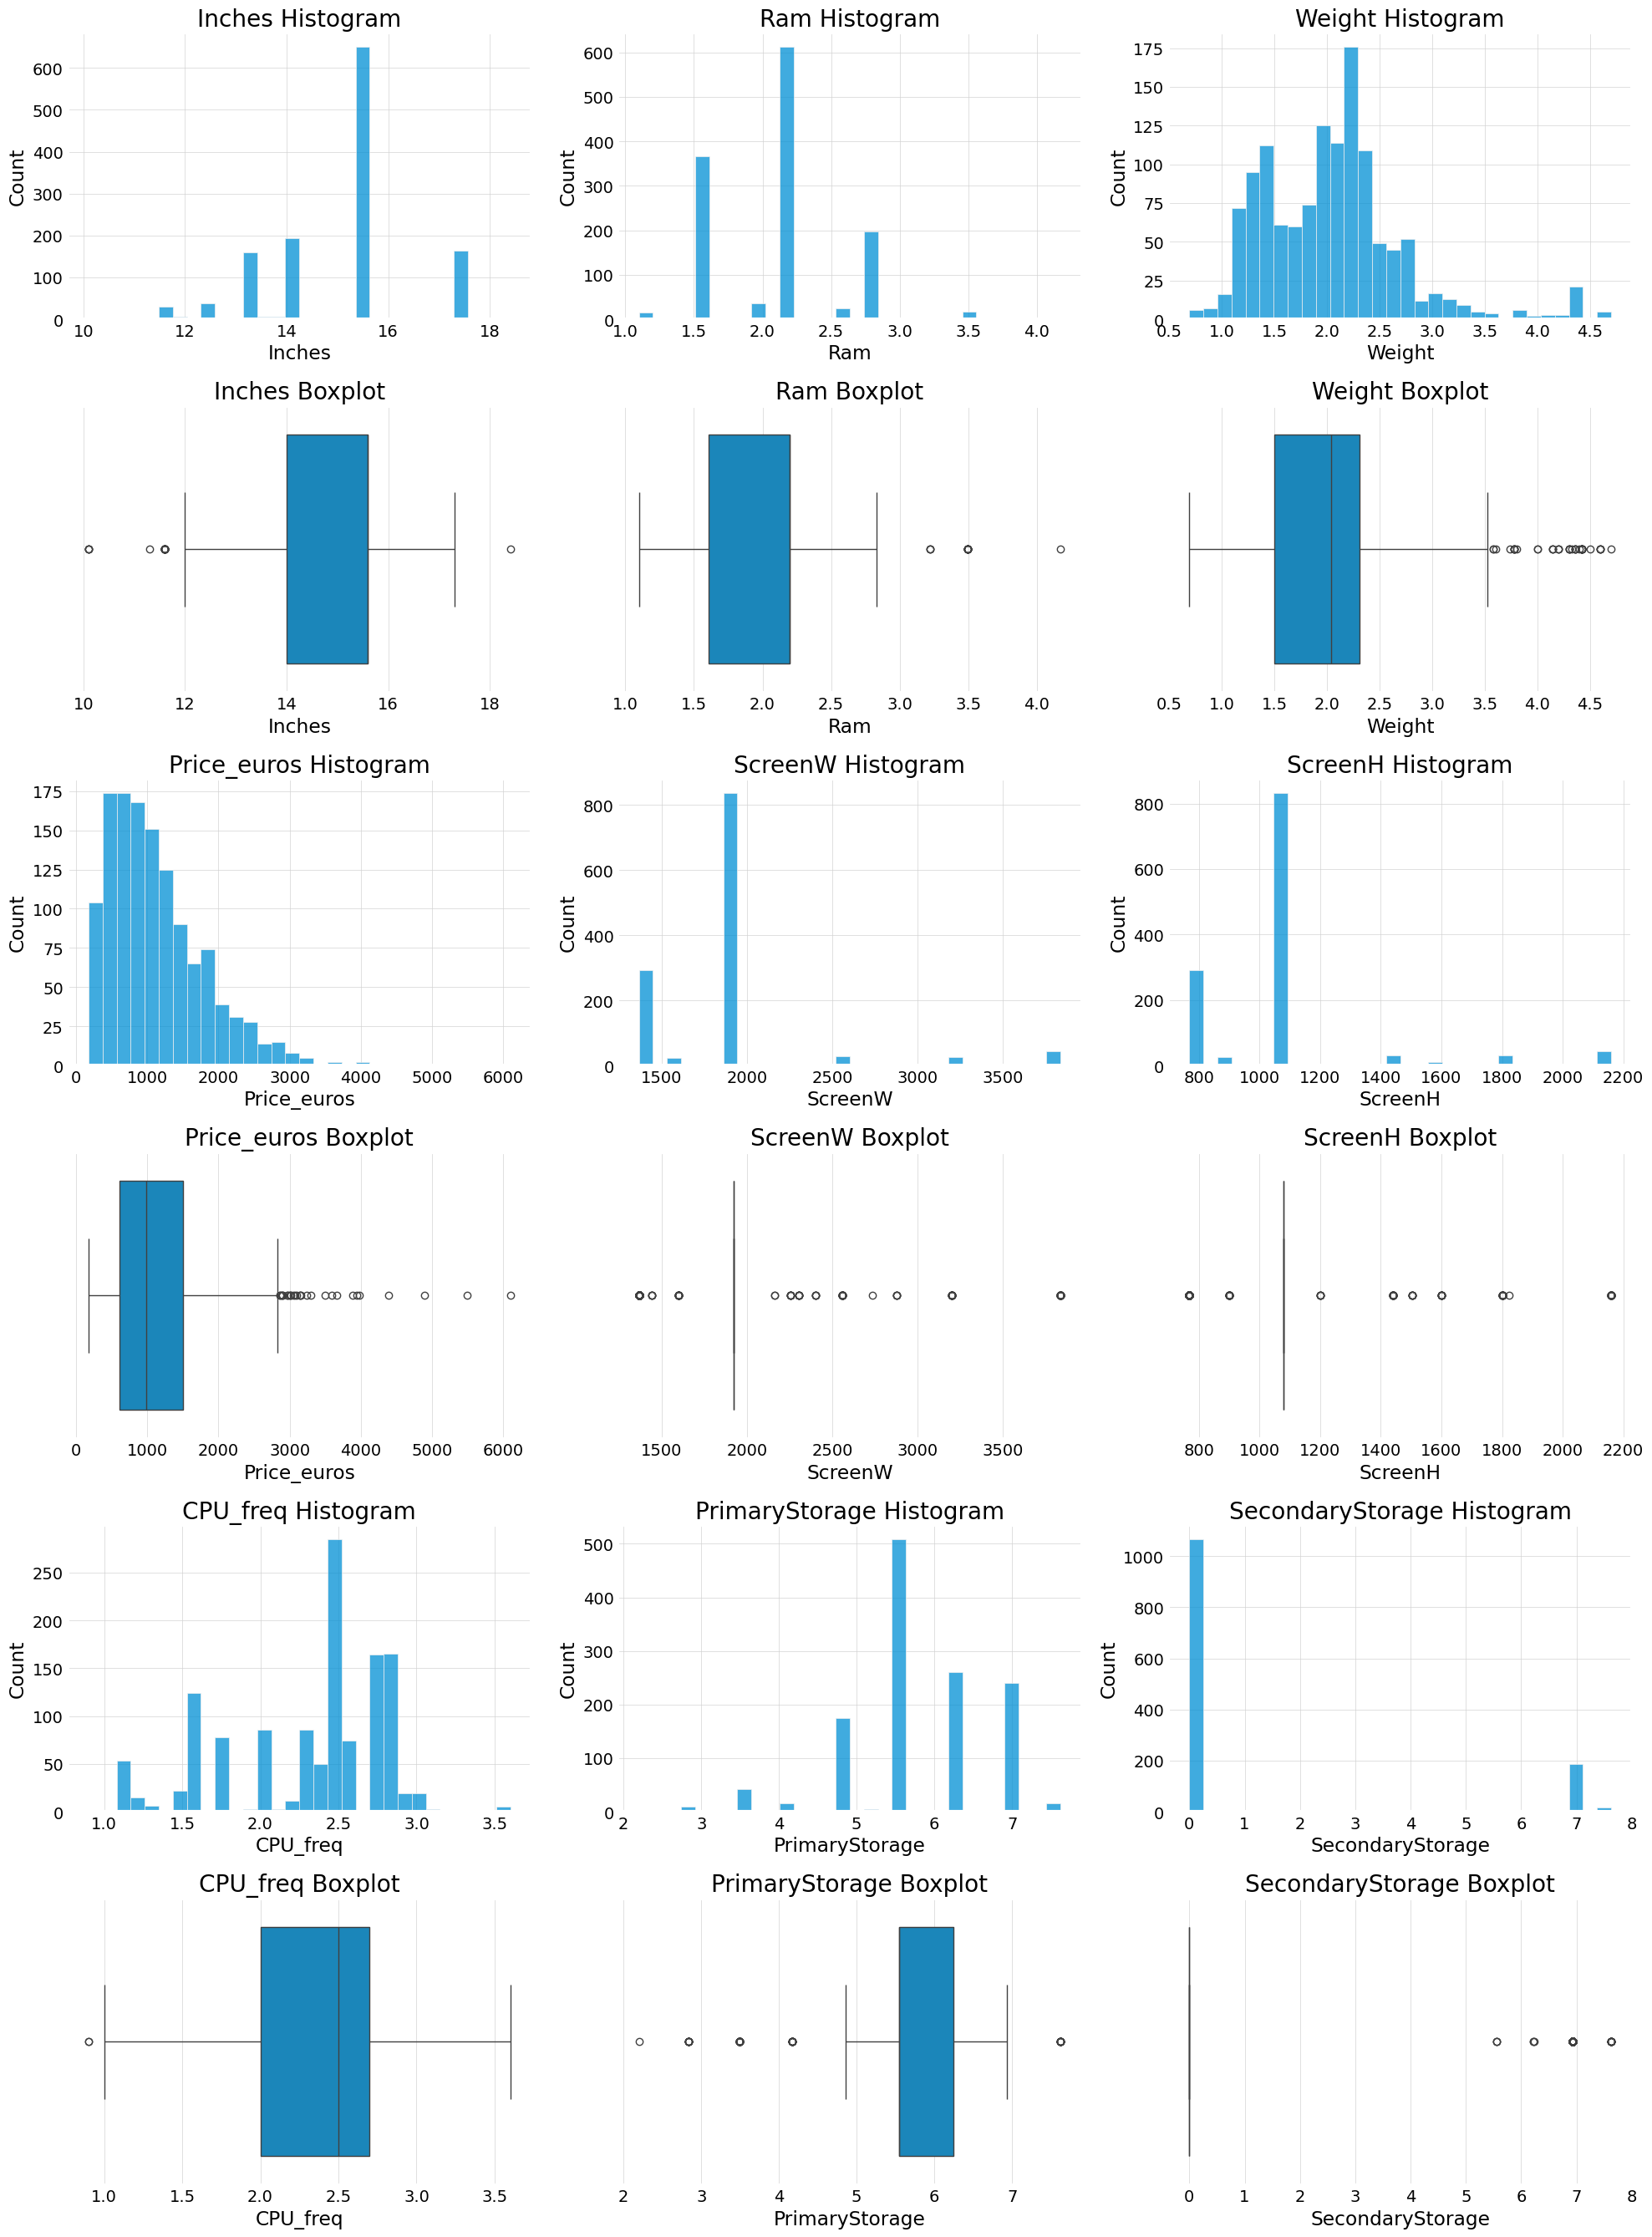

In [17]:
# Plot numerical distributions
plot_numerical_distributions(df, num_cols)

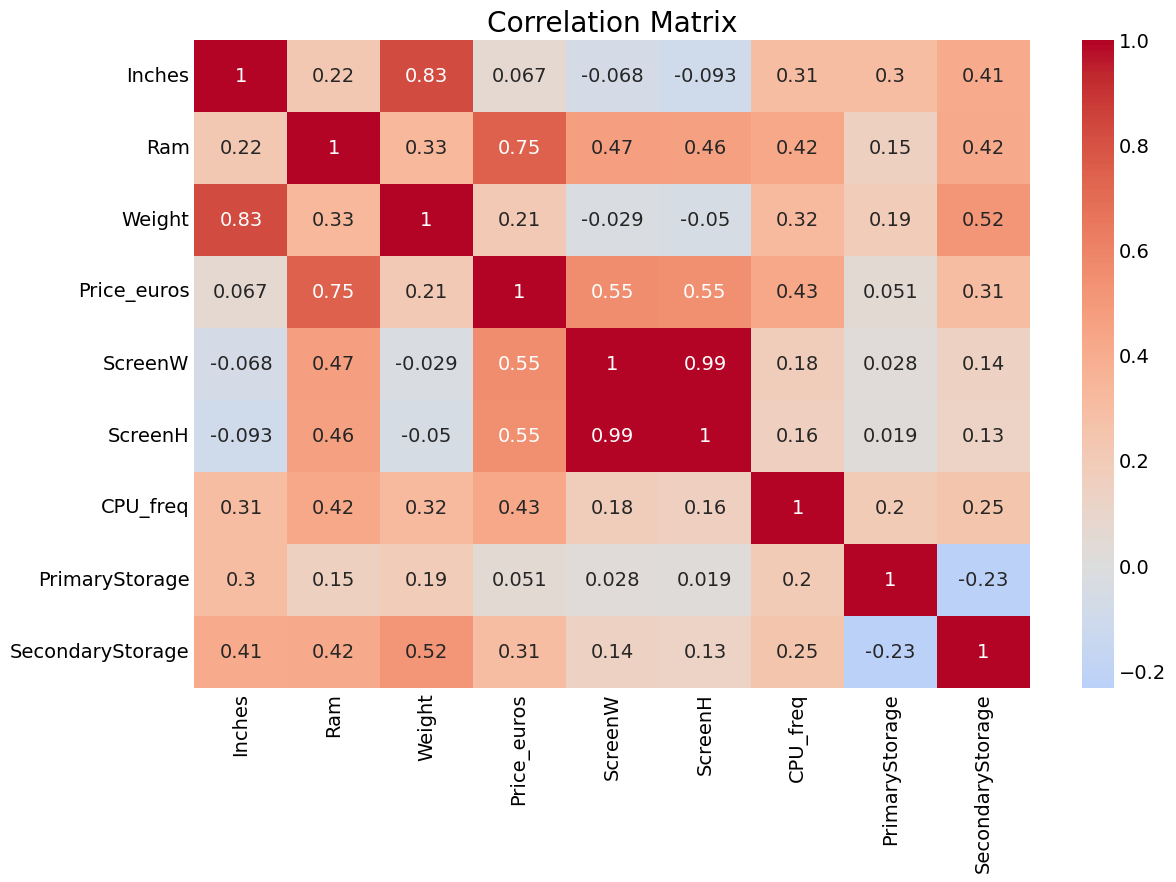

Correlation of Company with Price_euros:
Company    0.136541
dtype: float64

Correlation of Product with Price_euros:
Product    0.142888
dtype: float64

Correlation of TypeName with Price_euros:
TypeName   -0.125648
dtype: float64

Correlation of OS with Price_euros:
OS    0.290199
dtype: float64

Correlation of Screen with Price_euros:
Screen           -0.403834
ScreenW           0.552491
ScreenH           0.548529
Screen_Quality    0.058889
Screen_Ratio     -0.068356
dtype: float64

Correlation of Touchscreen with Price_euros:
Touchscreen    0.188886
dtype: float64

Correlation of IPSpanel with Price_euros:
IPSpanel    0.250737
dtype: float64

Correlation of RetinaDisplay with Price_euros:
RetinaDisplay    0.086775
dtype: float64

Correlation of CPU_company with Price_euros:
CPU_company    0.177881
dtype: float64

Correlation of CPU_model with Price_euros:
CPU_model    0.484466
dtype: float64

Correlation of PrimaryStorageType with Price_euros:
PrimaryStorageType    0.503655
dtype: 

In [18]:
# Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

def check_correlation_cat(df, columns, target_col):
    for col in columns:
        encoded_columns = [c for c in df.columns if c.startswith(col)]
        correlation = df[encoded_columns].corrwith(df[target_col])
        print(f"Correlation of {col} with {target_col}:\n{correlation}\n")
         
check_correlation_cat(df, cat_cols, 'Price_euros')

## 5. Model Development

In [19]:
# Prepare features and target
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(
	f'X_train shape: {X_train.shape}\n'+
	f'y_train shape: {y_train.shape}\n'+
	f'X_test shape:  {X_test.shape}\n'+
	f'y_test shape:  {y_test.shape}'
)

X_train shape: (1020, 41)
y_train shape: (1020,)
X_test shape:  (255, 41)
y_test shape:  (255,)


In [21]:
# Initialize and train model
model = XGBRegressor()

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation R² scores: [0.8405625  0.84811017 0.83089898 0.84204909 0.85935132]
Mean CV R² score: 0.8442 (+/- 0.0188)


## 6. Model Evaluation

Model Performance Metrics:
R² Score: 0.9170
Mean Squared Error: 41172.9568
Root Mean Squared Error: 202.9112
Mean Absolute Error: 142.4063


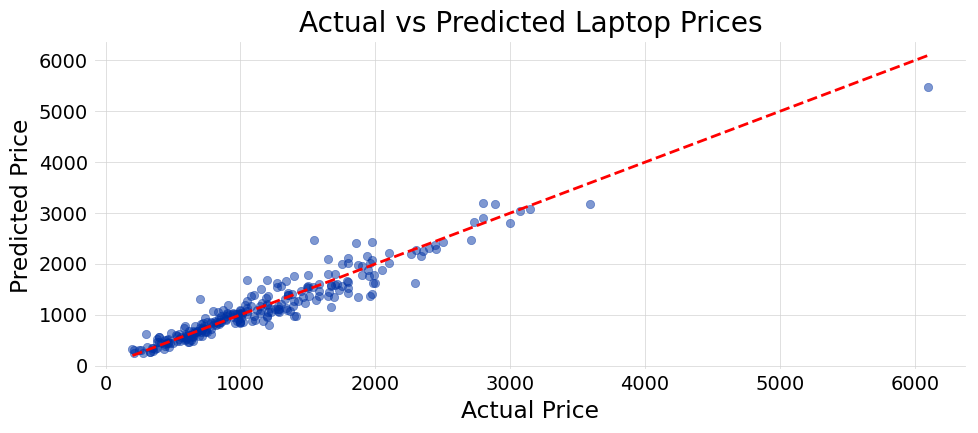

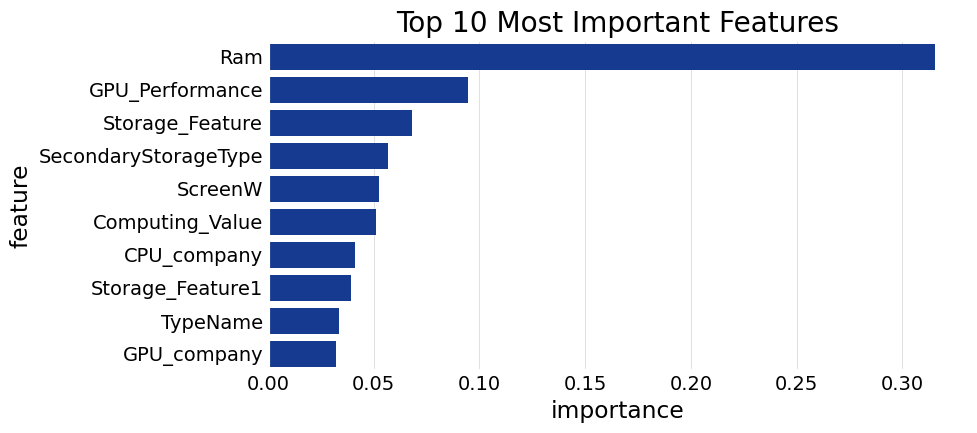

In [22]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 4.55))
plt.scatter(y_test, y_pred, alpha=0.5, color='#0032a4')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Laptop Prices')
plt.tight_layout()
plt.show()


# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 4.55))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', color='#0032a4')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()


In [23]:
# Generate sample regression data
X, y = make_regression(n_samples=1000, n_features=20, random_state=42)

def objective(trial):
    """Objective function for Optuna."""

    param_grid = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50), # Number of time model will build tree to fit data
        "max_depth": trial.suggest_int("max_depth", 3, 10), # Maximum depth of each tree
        "learning_rate": trial.suggest_float("learning_rate", 0.01,  0.3, log=True), # Weight added after learning each tree
    }

    model = XGBRegressor(**param_grid, objective='reg:squarederror', random_state=42)

    cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5, n_jobs=-1)
    return cv_scores.mean()

if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")  # We maximize R^2
    study.optimize(objective, n_trials=50)

    print("Best Parameters:", study.best_params)
    print("Best CV R2 Score:", study.best_value)

    best_params = study.best_params
    best_model = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
    best_model.fit(X,y)

    # Example usage:
    # predictions = best_model.predict(X_new)

[I 2024-12-22 07:39:08,387] A new study created in memory with name: no-name-5c386598-597f-44a2-8ef0-9e076207e25f
[I 2024-12-22 07:39:10,347] Trial 0 finished with value: 0.9155805633712385 and parameters: {'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.29133726804247956}. Best is trial 0 with value: 0.9155805633712385.
[I 2024-12-22 07:39:12,124] Trial 1 finished with value: 0.886499211216622 and parameters: {'n_estimators': 450, 'max_depth': 4, 'learning_rate': 0.01628496901780716}. Best is trial 0 with value: 0.9155805633712385.
[I 2024-12-22 07:39:14,552] Trial 2 finished with value: 0.892432123314299 and parameters: {'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.05534663208919106}. Best is trial 0 with value: 0.9155805633712385.
[I 2024-12-22 07:39:17,359] Trial 3 finished with value: 0.757847804346979 and parameters: {'n_estimators': 950, 'max_depth': 10, 'learning_rate': 0.19602159637840524}. Best is trial 0 with value: 0.9155805633712385.
[I 2024-12-22 07:39:

Best Parameters: {'n_estimators': 950, 'max_depth': 3, 'learning_rate': 0.05595045401960802}
Best CV R2 Score: 0.9411707422756692


In [24]:
xgb = XGBRegressor(**(study.best_params))

Optimized XGB Performance Metrics:
R² Score: 0.9300
Mean Squared Error: 34745.3555
Root Mean Squared Error: 186.4011
Mean Absolute Error: 134.4414


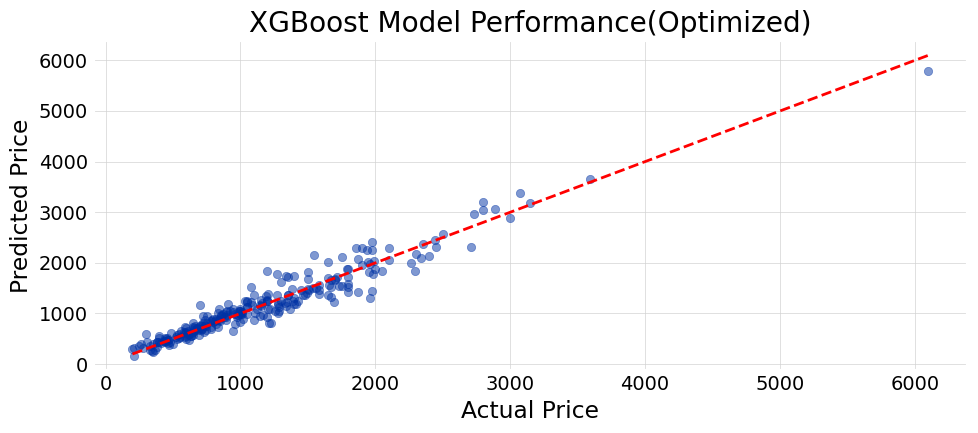

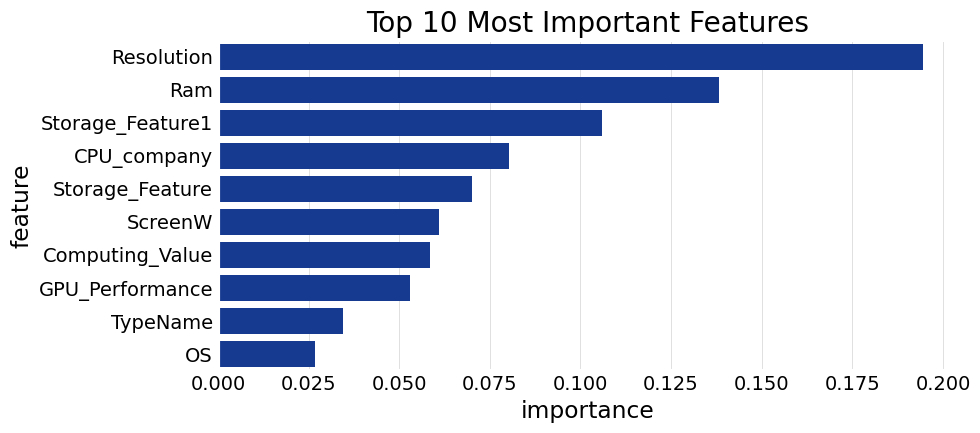

In [25]:
# Train Optimized Model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Optimized XGB Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 4.55))
plt.scatter(y_test, y_pred, alpha=0.5, color='#0032a4')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost Model Performance(Optimized)')
plt.tight_layout()
plt.show()


# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 4.55))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature', color='#0032a4')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()


### 6.2 Baseline Model (LinearRegression)

In [26]:
# Create a linear regression model
baseModel = LinearRegression()
# Perform cross-validation
cv_scores = cross_val_score(baseModel, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R² score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Cross-validation R² scores: [0.7883798  0.73172457 0.77814464 0.75159022 0.73813744]
Mean CV R² score: 0.7576 (+/- 0.0443)


Base Model Performance Metrics:
R² Score: 0.8075
Mean Squared Error: 95560.9917
Root Mean Squared Error: 309.1294
Mean Absolute Error: 214.5642


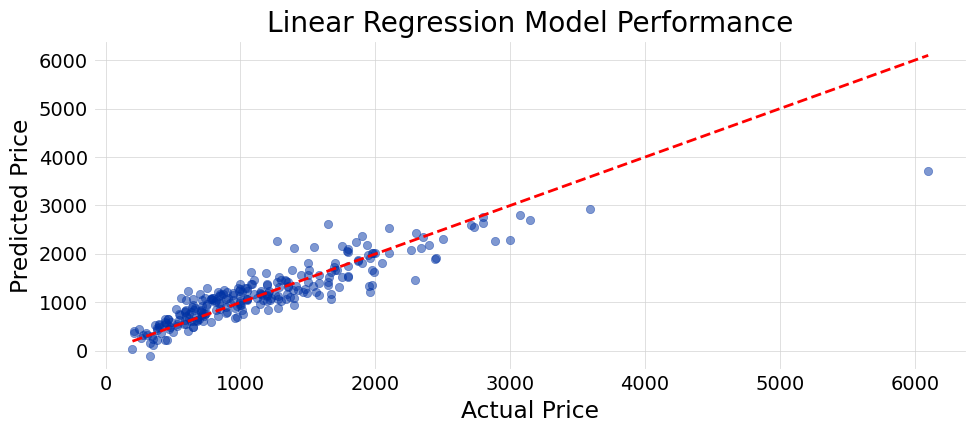

In [27]:
# Create a linear regression model
baseModel = LinearRegression()

# Train the model
baseModel.fit(X_train, y_train)

# Make predictions
y_pred = baseModel.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Base Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 4.55))
plt.scatter(y_test, y_pred, alpha=0.5, color='#0032a4')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression Model Performance')
plt.tight_layout()
plt.show()

## 7. Conclusions and Recommendations

### **Model Comparisons**
#### 1. **Linear Regression Model**
   - **Performance:**
     - \( R² \): 0.8075
     - MSE: 95560.9917
     - RMSE: 309.1294
     - MAE: 214.5642
   - **Analysis:**
     - Linear Regression provides a good baseline, capturing linear relationships in the dataset.
     - The higher RMSE and MAE indicate that the model struggles to handle non-linear patterns or complex interactions between features.
     - The residuals likely exhibit patterns suggesting underfitting.

#### 2. **Raw XGBoost Model**
   - **Performance:**
     - \( R² \): 0.9170
     - MSE: 41172.9568
     - RMSE: 202.9112
     - MAE: 142.4063
   - **Analysis:**
     - The raw XGBoost significantly outperforms Linear Regression, demonstrating its ability to capture non-linearities and interactions between features.
     - Lower RMSE and MAE show reduced errors, but there's still room for optimization, as reflected in feature importance and hyperparameter choices.

#### 3. **Optimized XGBoost Model (Optuna)**
   - **Performance:**
     - \( R² \): 0.9301
     - MSE: 34681.7221
     - RMSE: 186.2303
     - MAE: 134.0531
   - **Analysis:**
     - The optimized model achieves the best performance overall, with a notable improvement in \( R² \), RMSE, and MAE compared to the raw XGBoost.
     - The model benefits from fine-tuned parameters:
       - **n_estimators:** 100-1000 (step=50) ensures a balance between performance and overfitting.
       - **max_depth:** A depth between 3 and 10 prevents overfitting while capturing sufficient complexity.
       - **learning_rate:** A logarithmic range (0.01 to 0.3) controls incremental updates, avoiding drastic changes in predictions.
     - This demonstrates that hyperparameter tuning can extract more performance from an already powerful model.


### **Insights**
1. **Feature Importance:**
   - Both XGBoost models highlight the importance of features like `Resolution`, `RAM`, `Storage_Feature1`, and `ScreenW`.
   - Optimized XGBoost shows a slight shift in feature rankings, emphasizing `Resolution` more prominently. This indicates a stronger reliance on higher-resolution details to predict laptop prices.

2. **Residual Patterns:**
   - The scatterplots of predicted vs. actual prices show tighter clustering around the diagonal (perfect predictions) in the optimized XGBoost model.
   - Linear Regression residuals are more spread out, confirming its limitations for this problem.

3. **Generalization:**
   - The lower RMSE and MAE in the optimized XGBoost suggest better generalization compared to the raw model, making it more reliable for unseen data.


### **Potential Improvements**
1. **Feature Engineering:**
   - Explore interaction features or polynomial transformations of top features like `Resolution` and `RAM`.
   - Add domain-specific features, such as GPU performance benchmarks, to enhance the model’s understanding of laptop prices.

2. **Model Selection:**
   - Experiment with ensemble techniques (e.g., blending XGBoost with LightGBM) to compare performance.
   - Try additional optimization algorithms, such as Bayesian optimization, for potentially better hyperparameter tuning.

3. **Data Augmentation:**
   - If possible, expand the dataset with more laptops or introduce synthetic data to address potential overfitting in small data settings.

4. **Advanced Tuning:**
   - Fine-tune additional XGBoost parameters, such as `subsample`, `colsample_bytree`, and `gamma`, to further improve performance.

---

### **Final Thoughts**
- The **optimized XGBoost model** clearly outperforms both the raw XGBoost and Linear Regression models, validating the importance of hyperparameter tuning for this problem.
- The study demonstrates how modern machine learning techniques like XGBoost combined with advanced tuning tools like Optuna can yield highly accurate predictive models, especially in complex regression tasks.